<a href="https://colab.research.google.com/github/sadik-tofik/Group-2/blob/main/ai_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
data=pd.read_csv('spotify-2023.csv', encoding="ISO-8859-1")
data.head( )

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## 2. Handling Missing Values

In [16]:
# Check missing values
print(data.isnull().sum())

# Impute numerical columns with median. Correcting column names.
num_cols = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
for col in num_cols:
    if col in data.columns: # Check if column exists before imputing
        data[col].fillna(data[col].median(), inplace=True)

# Handle categorical missing data
cat_cols = ['key'] # 'mode' has no missing values
for col in cat_cols:
    data[col].fillna('unknown', inplace=True)

# Impute 'streams' with median, since it's now numeric after outlier treatment
if 'streams' in data.columns and pd.api.types.is_numeric_dtype(data['streams']):
    data['streams'].fillna(data['streams'].median(), inplace=True)

# Impute 'in_shazam_charts' with a placeholder or appropriate method, assuming it's object/string
if 'in_shazam_charts' in data.columns:
    data['in_shazam_charts'].fillna('unknown', inplace=True)


# Drop rows with missing critical data (streams has been handled, release_year has no missing)
# Removed dropna as the critical missing values are being imputed or were already 0

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


<ipython-input-16-d386fc4d75b6>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-16-d386fc4d75b6>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

## 3. Outlier Treatment

In [17]:
import numpy as np

# Function to treat outliers using IQR
def treat_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

# Convert 'streams' to numeric, coercing errors
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Apply to numerical columns (only 'streams' is relevant from the original list)
# Filter out non-numeric columns and columns that don't exist
numerical_cols_for_outlier_treatment = [col for col in ['streams'] if col in data.columns and pd.api.types.is_numeric_dtype(data[col])]

for col in numerical_cols_for_outlier_treatment:
    data = treat_outliers(data, col)

## 4. Feature Engineering

In [20]:
# Create target variable (top 25% streams are popular)
threshold = data['streams'].quantile(0.75)
data['is_popular'] = (data['streams'] >= threshold).astype(int)

# Temporal features
data['decade'] = (data['released_year'] // 10) * 10
data['release_month'] = pd.to_datetime(data[['released_year', 'released_month', 'released_day']].rename(columns={
    'released_year': 'year',
    'released_month': 'month',
    'released_day': 'day'
})).dt.month

# Create season feature
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data['season'] = data['release_month'].apply(get_season)

# Artist count feature
data['artist_count'] = data['artist(s)_name'].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 1)

## 5. Exploratory Data Analysis (EDA)

### Target Variable Distribution

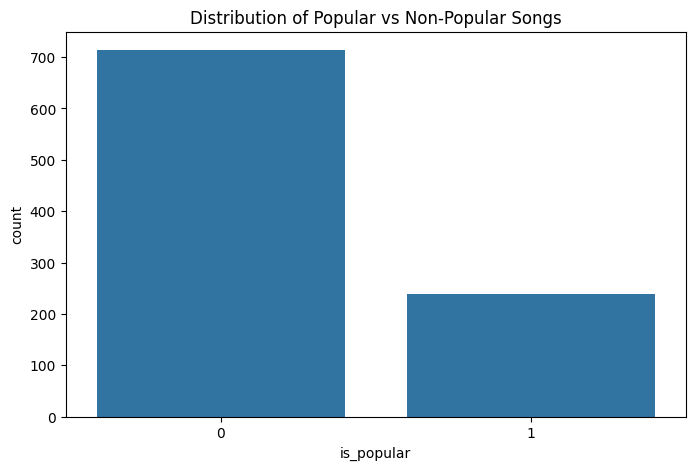

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='is_popular', data=data)
plt.title('Distribution of Popular vs Non-Popular Songs')
plt.show()

### Temporal Trends

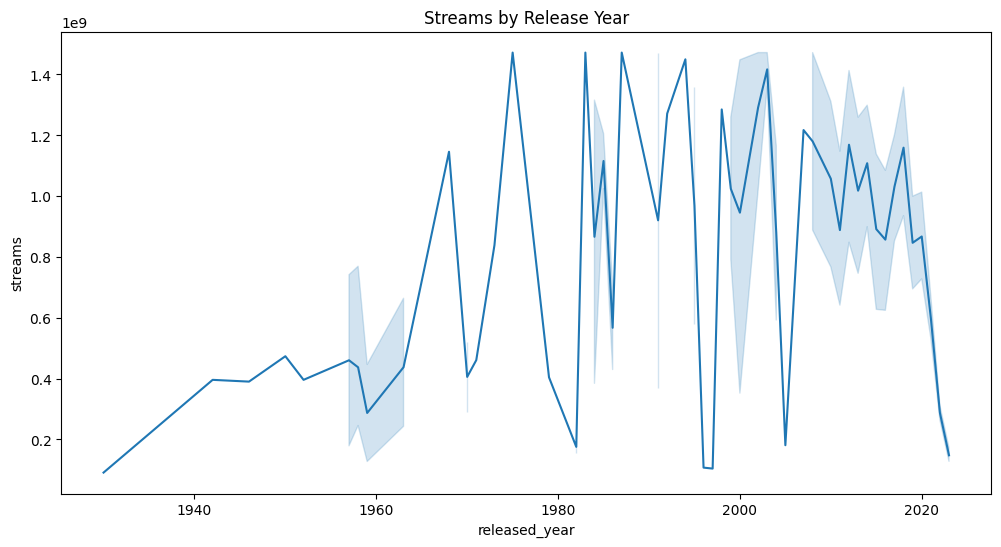

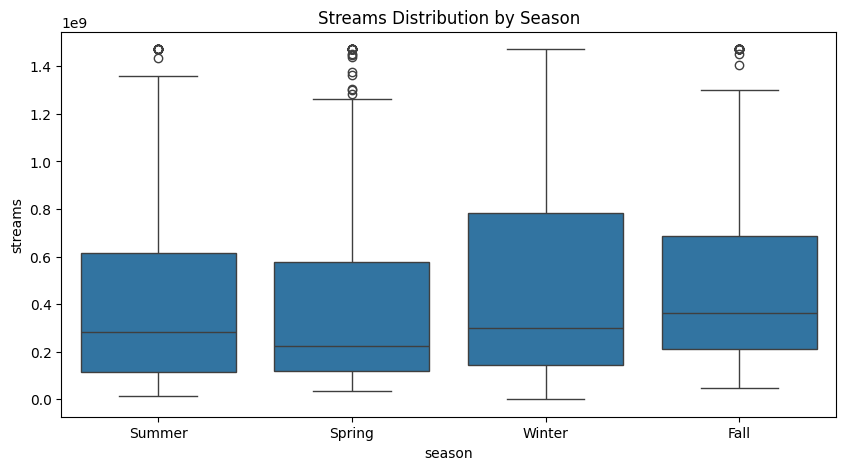

In [24]:
# Streams by year
plt.figure(figsize=(12,6))
sns.lineplot(x='released_year', y='streams', data=data)
plt.title('Streams by Release Year')
plt.show()

# Popularity by season
plt.figure(figsize=(10,5))
sns.boxplot(x='season', y='streams', data=data)
plt.title('Streams Distribution by Season')
plt.show()

### Audio Feature Analysis

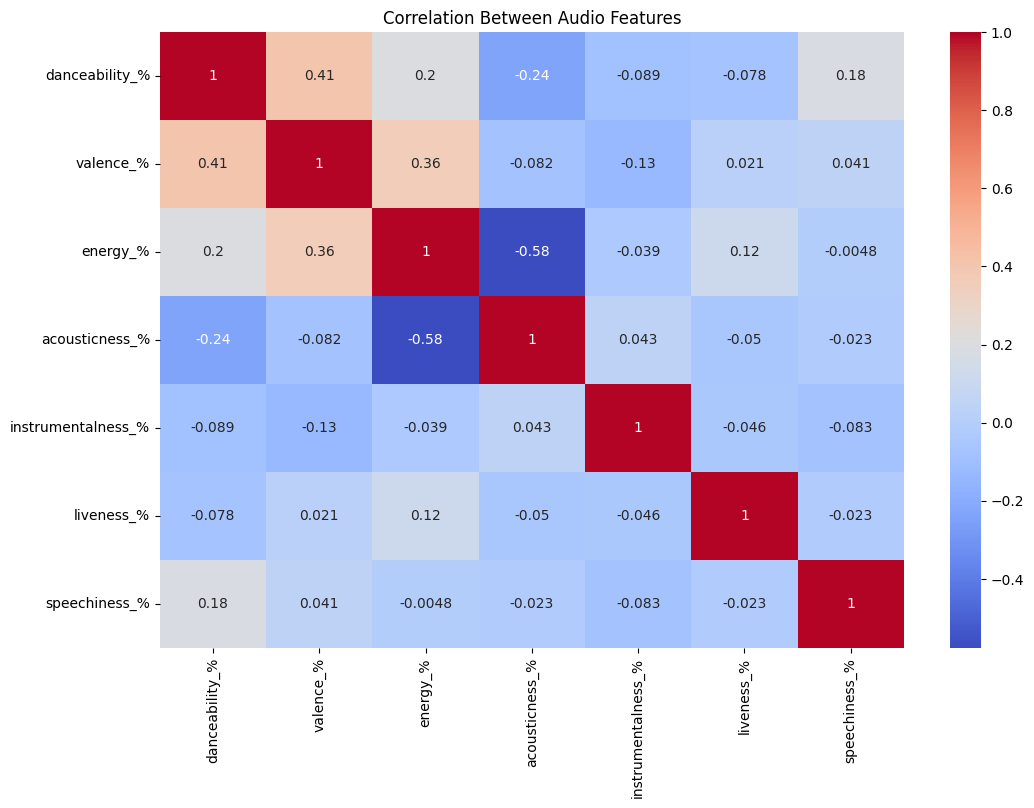

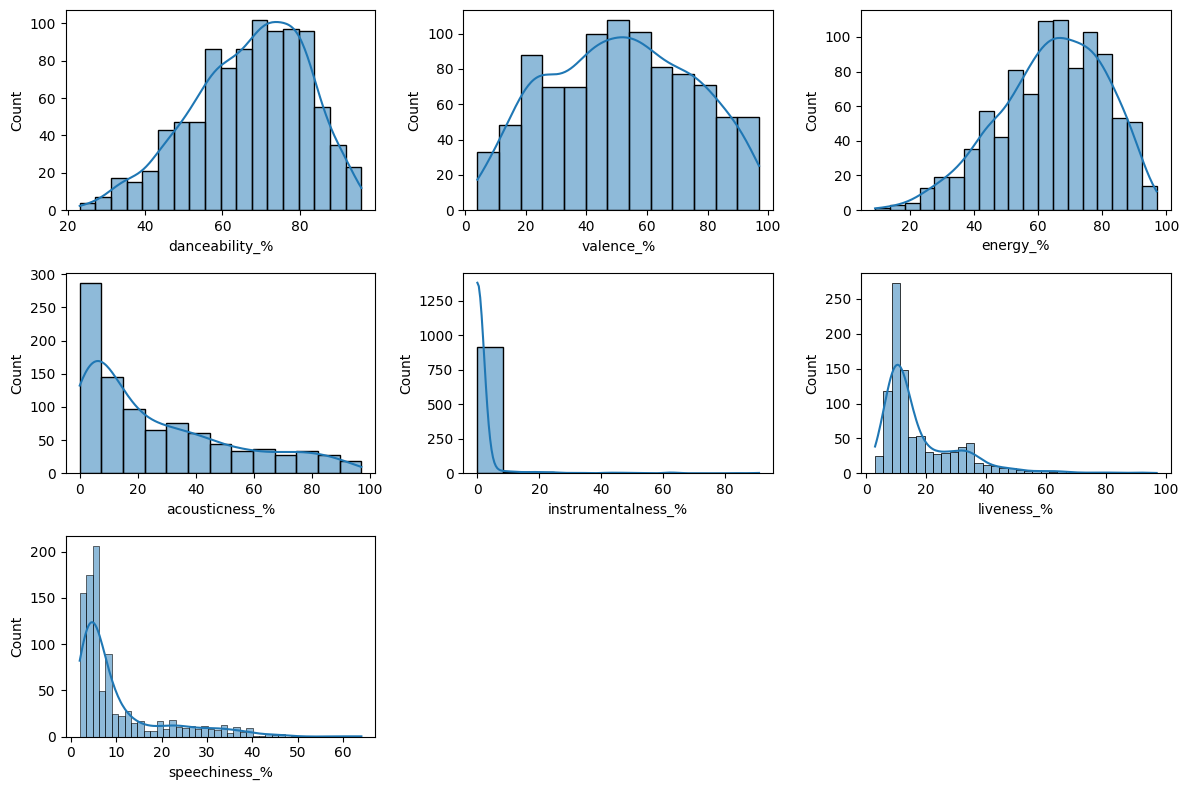

In [26]:
# Correlation heatmap
audio_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
plt.figure(figsize=(12,8))
sns.heatmap(data[audio_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features')
plt.show()

# Feature distributions
plt.figure(figsize=(12,8))
for i, col in enumerate(audio_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
plt.tight_layout()
plt.show()

### Artist Analysis

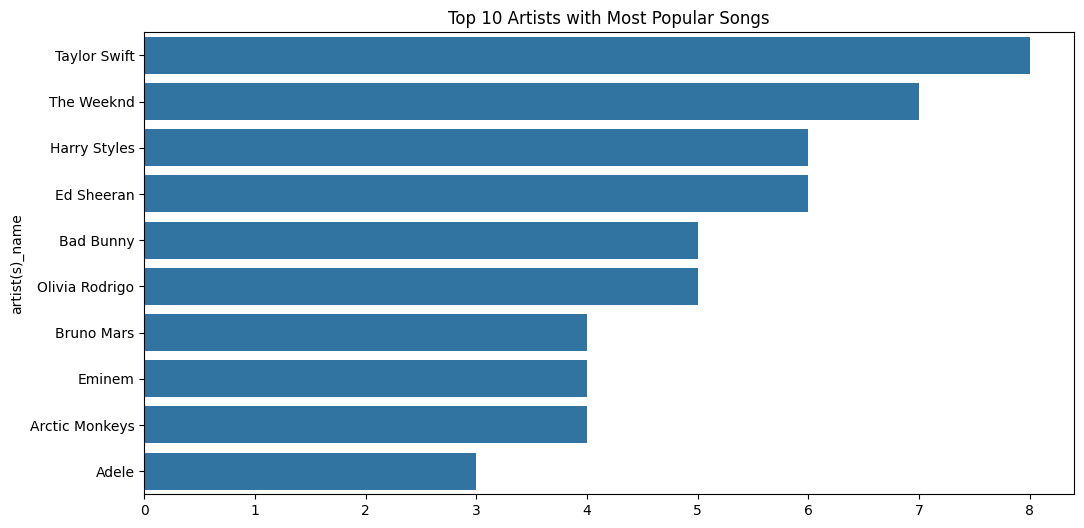

In [28]:
# Top artists with popular songs
plt.figure(figsize=(12,6))
top_artists = data[data['is_popular']==1]['artist(s)_name'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists with Most Popular Songs')
plt.show()

## 6. Feature Scaling (For Modeling Prep)

In [30]:
from sklearn.preprocessing import StandardScaler

# Select features for modeling
features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_count']

# Standardize features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Final check
print(data[features].describe())

       danceability_%      energy_%     valence_%  acousticness_%  \
count    9.530000e+02  9.530000e+02  9.530000e+02    9.530000e+02   
mean    -3.373773e-16 -2.236756e-16  1.118378e-17    4.846304e-17   
std      1.000525e+00  1.000525e+00  1.000525e+00    1.000525e+00   
min     -3.006892e+00 -3.341776e+00 -2.021077e+00   -1.041385e+00   
25%     -6.817764e-01 -6.818539e-01 -8.279791e-01   -8.104596e-01   
50%      1.388525e-01  1.040320e-01 -1.837668e-02   -3.486091e-01   
75%      7.543241e-01  7.690125e-01  7.912257e-01    6.135794e-01   
max      1.985267e+00  1.978068e+00  1.941713e+00    2.691907e+00   

       instrumentalness_%    liveness_%  speechiness_%  artist_count  
count        9.530000e+02  9.530000e+02   9.530000e+02  9.530000e+02  
mean        -5.591889e-18  1.118378e-17   2.982341e-17  3.168737e-17  
std          1.000525e+00  1.000525e+00   1.000525e+00  1.000525e+00  
min         -1.881320e-01 -1.110112e+00  -8.206927e-01 -6.259860e-01  
25%         -1.881320e-